#Langkah 1.1: Penyiapan Lingkungan & Import Libraries

In [1]:
# Instalasi library yfinance jika belum ada (diperlukan untuk mengambil data dari Yahoo Finance)
!pip install yfinance

# Import libraries untuk manipulasi data dan numerik
import numpy as np
import pandas as pd

# Import library untuk mengambil data finansial
import yfinance as yf

# Import libraries untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library deep learning: TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Import library untuk pra-pemrosesan dan evaluasi model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Pengaturan untuk visualisasi yang lebih baik
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Cek versi library untuk memastikan reproduktifitas
print("Setup Selesai.")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")

Setup Selesai.
TensorFlow Version: 2.18.0
Pandas Version: 2.2.2
NumPy Version: 2.0.2


# Langkah 1.2: Pengumpulan & Pemuatan Data

In [2]:


# Tentukan ticker untuk Bitcoin terhadap Dolar AS
ticker = 'BTC-USD'

# Tentukan rentang waktu data yang akan diambil
# Kita akan mengambil data dari 1 Januari 2017 hingga hari ini
# Mengambil data dari rentang yang panjang penting agar model dapat mempelajari berbagai siklus pasar
from datetime import datetime
start_date = '2017-01-01'
end_date = datetime.now().strftime('%Y-%m-%d') # Ambil tanggal hari ini secara dinamis

# Unduh data menggunakan yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Periksa apakah data berhasil diunduh
if df.empty:
    print(f"Tidak ada data yang ditemukan untuk ticker {ticker}. Periksa koneksi atau ticker.")
else:
    print(f"Data untuk {ticker} berhasil diunduh.")

    # Tampilkan 5 baris pertama dari data untuk inspeksi awal
    print("\n5 Baris Pertama Data (Head):")
    display(df.head())

    # Tampilkan 5 baris terakhir dari data untuk memastikan data up-to-date
    print("\n5 Baris Terakhir Data (Tail):")
    display(df.tail())

    # Tampilkan informasi dasar tentang dataset
    print(f"\nBentuk (Shape) dari DataFrame: {df.shape}")
    print("DataFrame memiliki {df.shape[0]} baris (hari) dan {df.shape[1]} kolom (fitur).")

/tmp/ipython-input-2-2038313720.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data untuk BTC-USD berhasil diunduh.

5 Baris Pertama Data (Head):


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008



5 Baris Terakhir Data (Tail):


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-06-13,106090.968750,106182.546875,102822.023438,105924.593750,69550440846
2025-06-14,105472.406250,106203.757812,104379.367188,106108.085938,38007870453
2025-06-15,105552.023438,106157.101562,104519.882812,105464.843750,36744307742
2025-06-16,106796.757812,108915.375000,104997.625000,105555.593750,50366626945
2025-06-17,104601.117188,107750.195312,103396.531250,106794.117188,55964092176



Bentuk (Shape) dari DataFrame: (3090, 5)
DataFrame memiliki {df.shape[0]} baris (hari) dan {df.shape[1]} kolom (fitur).


# Langkah 1.3: Exploratory Data Analysis (EDA)

In [3]:
# Langkah 1.3: Exploratory Data Analysis (EDA)

# a) Pengecekan Informasi Dasar dan Missing Values
# Ini akan memberi kita ringkasan teknis dari DataFrame kita.
print("========================================")
print("Informasi Dasar DataFrame (df.info()):")
print("========================================")
df.info()

# Mari kita periksa secara eksplisit apakah ada nilai yang hilang (null/NaN) di setiap kolom.
print("\n========================================")
print("Jumlah Missing Values per Kolom:")
print("========================================")
missing_values = df.isnull().sum()
print(missing_values)

# Beri kesimpulan berdasarkan pengecekan
if missing_values.sum() == 0:
    print("\n--> KESIMPULAN: Data kita bersih! Tidak ada nilai yang hilang.")
else:
    print("\n--> PERHATIAN: Ditemukan nilai yang hilang. Perlu penanganan lebih lanjut.")

Informasi Dasar DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3090 entries, 2017-01-01 to 2025-06-17
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3090 non-null   float64
 1   (High, BTC-USD)    3090 non-null   float64
 2   (Low, BTC-USD)     3090 non-null   float64
 3   (Open, BTC-USD)    3090 non-null   float64
 4   (Volume, BTC-USD)  3090 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 144.8 KB

Jumlah Missing Values per Kolom:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

--> KESIMPULAN: Data kita bersih! Tidak ada nilai yang hilang.


In [4]:
# Langkah 1.3 Lanjutan

# --- Menyederhanakan Nama Kolom ---
print("Nama kolom sebelum disederhanakan:")
print(df.columns)

# Ambil level pertama dari MultiIndex ('Close', 'High', dll.) sebagai nama kolom baru
df.columns = df.columns.get_level_values(0)

print("\nNama kolom SETELAH disederhanakan:")
print(df.columns)
print("\nStruktur DataFrame kita sekarang lebih sederhana dan bersih!")

# --- Analisis Statistik Deskriptif ---
print("\n========================================")
print("Statistik Deskriptif Data:")
print("========================================")
# Tampilkan statistik deskriptif untuk melihat sebaran data
display(df.describe())

Nama kolom sebelum disederhanakan:
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

Nama kolom SETELAH disederhanakan:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

Struktur DataFrame kita sekarang lebih sederhana dan bersih!

Statistik Deskriptif Data:


Price,Close,High,Low,Open,Volume
count,3090.000000,3090.000000,3090.000000,3090.000000,3.090000e+03
mean,28896.962695,29489.924460,28209.577178,28864.881556,2.497159e+10
std,26936.788872,27432.431416,26359.238877,26908.321033,2.067604e+10
min,777.757019,823.307007,755.755981,775.177979,6.085170e+07
25%,7660.045044,7839.751587,7484.303223,7645.381958,9.355665e+09
50%,19471.913086,19982.005859,19119.802734,19446.691406,2.182297e+10
75%,43771.385742,44366.282227,42773.410156,43758.945312,3.472517e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11



Membuat Plot Harga Historis...


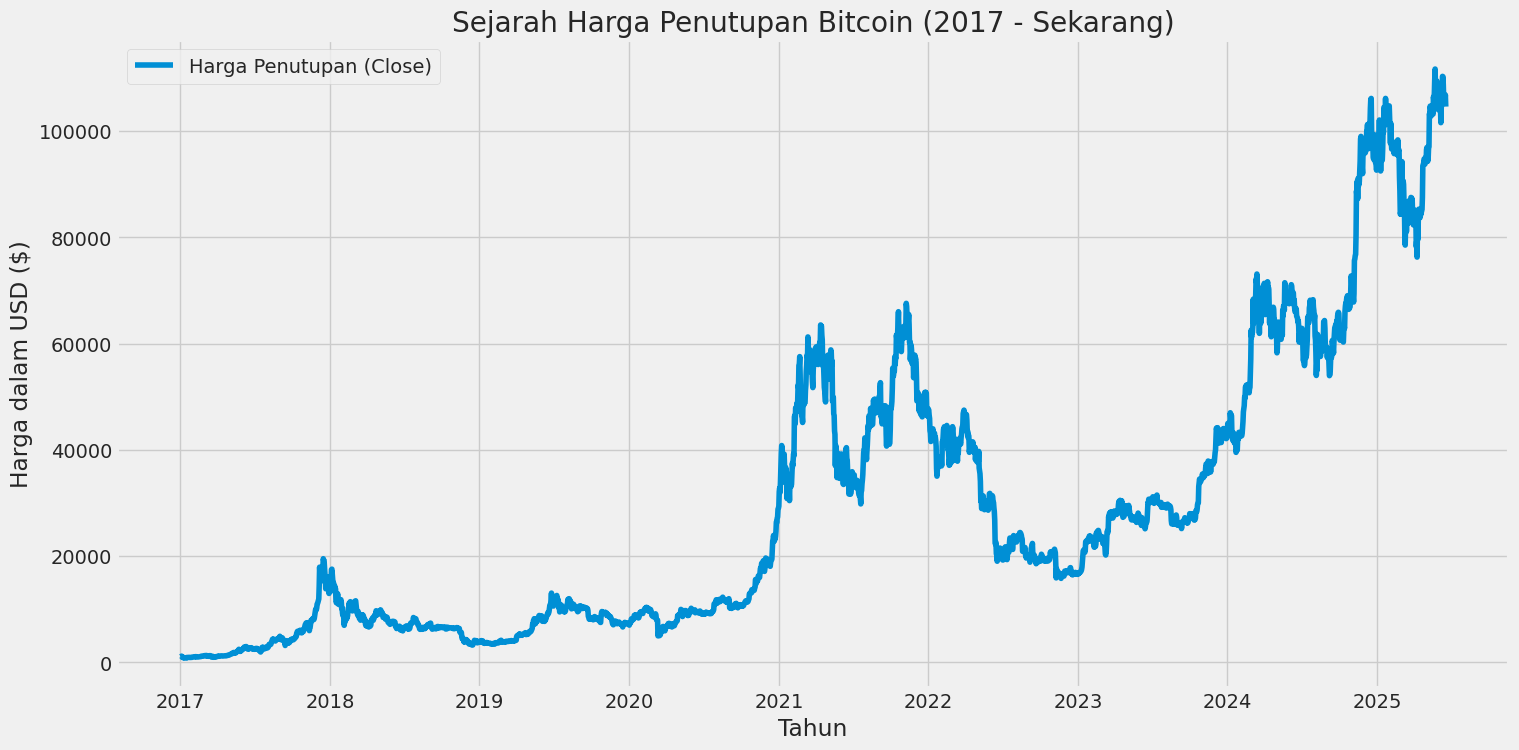

In [5]:
# --- Visualisasi Harga Penutupan (Close Price) Historis ---
print("\n========================================")
print("Membuat Plot Harga Historis...")
print("========================================")

plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Harga Penutupan (Close)')
plt.title('Sejarah Harga Penutupan Bitcoin (2017 - Sekarang)')
plt.xlabel('Tahun')
plt.ylabel('Harga dalam USD ($)')
plt.legend()
plt.show()

# Tahap 2: Pra-pemrosesan & Persiapan Fitur

In [6]:
# Tahap 2: Pra-pemrosesan & Persiapan Fitur

# 1. Buat DataFrame baru yang hanya berisi harga penutupan (Close)
data_close = df.filter(['Close'])
# Ubah DataFrame menjadi numpy array
dataset = data_close.values
# Dapatkan jumlah baris yang akan digunakan untuk melatih model (80% dari total data)
training_data_len = int(np.ceil(len(dataset) * .8))

print(f"Total dataset: {len(dataset)} baris")
print(f"Jumlah data training (80%): {training_data_len} baris")
print(f"Jumlah data test (20%): {len(dataset) - training_data_len} baris")

# 2. Normalisasi Data
# Inisialisasi scaler untuk mengubah data ke rentang [0, 1]
scaler = MinMaxScaler(feature_range=(0,1))
# Latih dan transform data training menggunakan scaler
scaled_data = scaler.fit_transform(dataset)

# Buat dataset training yang sudah dinormalisasi
train_data = scaled_data[0:int(training_data_len), :]

# Buat dataset testing yang sudah dinormalisasi
test_data = scaled_data[training_data_len - 60: , :]


print("\nData setelah dinormalisasi (5 baris pertama dari data training):")
print(train_data[0:5])

Total dataset: 3090 baris
Jumlah data training (80%): 2472 baris
Jumlah data test (20%): 618 baris

Data setelah dinormalisasi (5 baris pertama dari data training):
[[0.00198897]
 [0.00220021]
 [0.0023994 ]
 [0.00339935]
 [0.00212473]]


# Langkah 3.1: Membuat Urutan Data (Sequence Creation)

In [7]:
# Langkah 3.1: Membuat Urutan Data (Sequence Creation)

# Definisikan panjang urutan waktu (time step)
# Artinya kita akan melihat 60 data sebelumnya untuk memprediksi data ke-61
time_step = 60

# --- Membuat data training ---
X_train = []
y_train = []

for i in range(time_step, len(train_data)):
    # Ambil 60 data (i-60 sampai i) sebagai fitur (X)
    X_train.append(train_data[i-time_step:i, 0])
    # Ambil data ke-61 (i) sebagai target/label (y)
    y_train.append(train_data[i, 0])

# Ubah list menjadi numpy array agar bisa diproses oleh Keras
X_train, y_train = np.array(X_train), np.array(y_train)

# --- Membuat data testing ---
X_test = []
# y_test akan kita buat dari 'dataset' asli agar bisa dibandingkan nanti
y_test = dataset[training_data_len:, :]

for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i, 0])

# Ubah list menjadi numpy array
X_test = np.array(X_test)

# Reshape data menjadi format 3D [jumlah sampel, time steps, jumlah fitur] yang dibutuhkan oleh LSTM
# Jumlah fitur kita adalah 1 (hanya 'Close' price)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("Bentuk (shape) dari data training:")
print(f"X_train: {X_train.shape}") # Harusnya (jumlah sampel, 60, 1)
print(f"y_train: {y_train.shape}")

print("\nBentuk (shape) dari data testing:")
print(f"X_test: {X_test.shape}") # Harusnya (jumlah sampel, 60, 1)
print(f"y_test: {y_test.shape}")

Bentuk (shape) dari data training:
X_train: (2412, 60, 1)
y_train: (2412,)

Bentuk (shape) dari data testing:
X_test: (618, 60, 1)
y_test: (618, 1)


# Langkah 3.2: Pembangunan Arsitektur Model LSTM

In [8]:
# Langkah 3.2: Pembangunan Arsitektur Model LSTM

# Inisialisasi model sebagai model Sequential
model = Sequential()

# ---- Layer 1 ----
# Tambahkan layer LSTM dengan 50 unit/neuron.
# argumen return_sequences=True diperlukan karena kita akan menambahkan layer LSTM lain setelah ini.
# argumen input_shape hanya diperlukan di layer pertama.
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Tambahkan layer Dropout untuk mencegah overfitting
model.add(Dropout(0.2))

# ---- Layer 2 ----
# Tambahkan layer LSTM kedua
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# ---- Layer 3 ----
# Tambahkan layer LSTM ketiga
# Kali ini return_sequences=False (default) karena ini adalah layer LSTM terakhir.
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# ---- Layer Output ----
# Tambahkan layer Dense sebagai output.
# Hanya memiliki 1 unit karena kita hanya memprediksi 1 nilai (harga penutupan).
model.add(Dense(units=1))


# Tampilkan ringkasan (summary) dari arsitektur model yang telah kita bangun
print("========================================")
print("Ringkasan Arsitektur Model")
print("========================================")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Ringkasan Arsitektur Model


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

# Langkah 3.3: Kompilasi Model

In [9]:
# Langkah 3.3: Kompilasi Model

# Mengompilasi model dengan optimizer 'adam' dan loss function 'mean_squared_error'
model.compile(optimizer='adam', loss='mean_squared_error')

print("========================================")
print("Konfigurasi Proses Belajar")
print("========================================")
print("Model berhasil dikompilasi.")
print(f"Optimizer yang digunakan: {model.optimizer.get_config()['name']}")
print(f"Fungsi Kerugian (Loss Function) yang digunakan: {model.loss}")

Konfigurasi Proses Belajar
Model berhasil dikompilasi.
Optimizer yang digunakan: adam
Fungsi Kerugian (Loss Function) yang digunakan: mean_squared_error


# Langkah 3.4: Pelatihan Model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Definisikan callback EarlyStopping
# 'monitor': metrik yang dipantau -> val_loss
# 'patience': berapa epoch menunggu sebelum berhenti jika tidak ada perbaikan -> misal 15
# 'restore_best_weights': Wajib True! Ini akan mengembalikan model ke kondisi terbaiknya.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

print("========================================")
print("Memulai Proses Pelatihan Cerdas dengan EarlyStopping...")
print("========================================")
print("Epoch diatur ke 300, tetapi training akan berhenti otomatis jika val_loss tidak membaik.")


# Latih ulang model
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=300, # Atur ke angka besar
    validation_split=0.1,
    callbacks=[early_stopping], # Tambahkan callback kita ke proses training
    verbose=1
)

print("\n========================================")
print("Pelatihan Model Selesai!")
print("========================================")

Memulai Proses Pelatihan Cerdas dengan EarlyStopping...
Epoch diatur ke 300, tetapi training akan berhenti otomatis jika val_loss tidak membaik.
Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0165 - val_loss: 7.0275e-04
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015 - val_loss: 2.1515e-04
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 1.9902e-04
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010 - val_loss: 1.9717e-04
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.2068e-04 - val_loss: 1.8284e-04
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.9632e-04 - val_loss: 2.4966e-04
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.3450e-04 - val_loss: 1.9110e-04
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3922e-04 - val_loss: 1.9432e-04
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3743e-04 - val_loss: 1.7799e-04
Epoch 10/300
34/34 ━━━━━

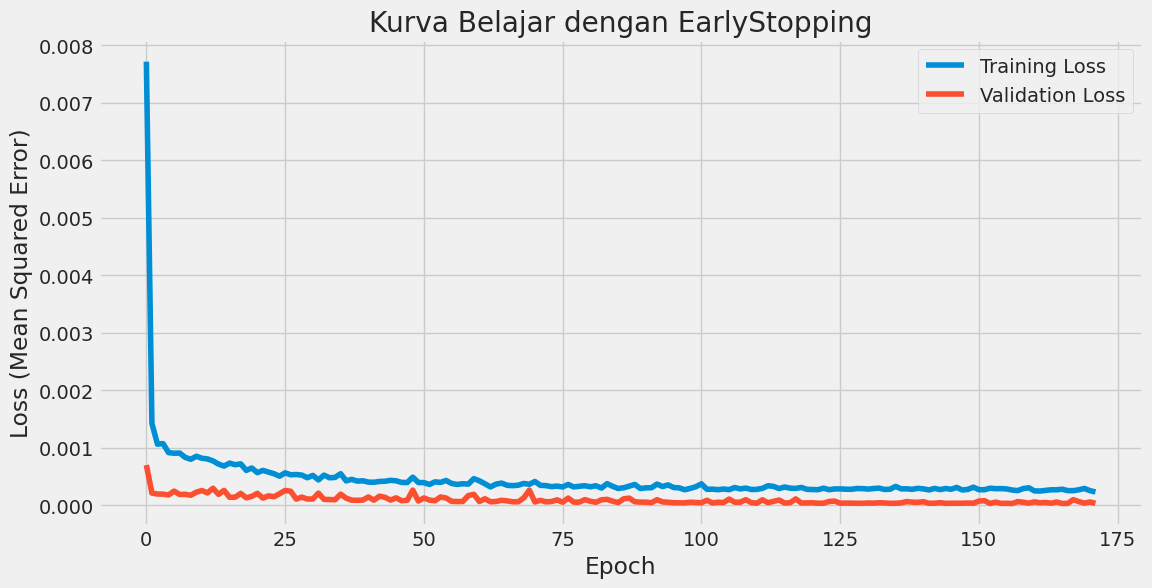

In [11]:
# Plot hasilnya lagi untuk melihat kapan training berhenti
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Kurva Belajar dengan EarlyStopping')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()

# Tahap 4: Evaluasi & Penyimpanan Model
# Langkah 4.1: Prediksi & Evaluasi

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Hasil Evaluasi Model pada Data Test
Root Mean Squared Error (RMSE): $3,702.37
Artinya, secara rata-rata, prediksi model kita meleset sekitar nilai ini dari harga sebenarnya.

Membuat plot perbandingan harga aktual vs. prediksi...


/tmp/ipython-input-12-774115430.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions # Tambahkan kolom prediksi ke dataframe validasi


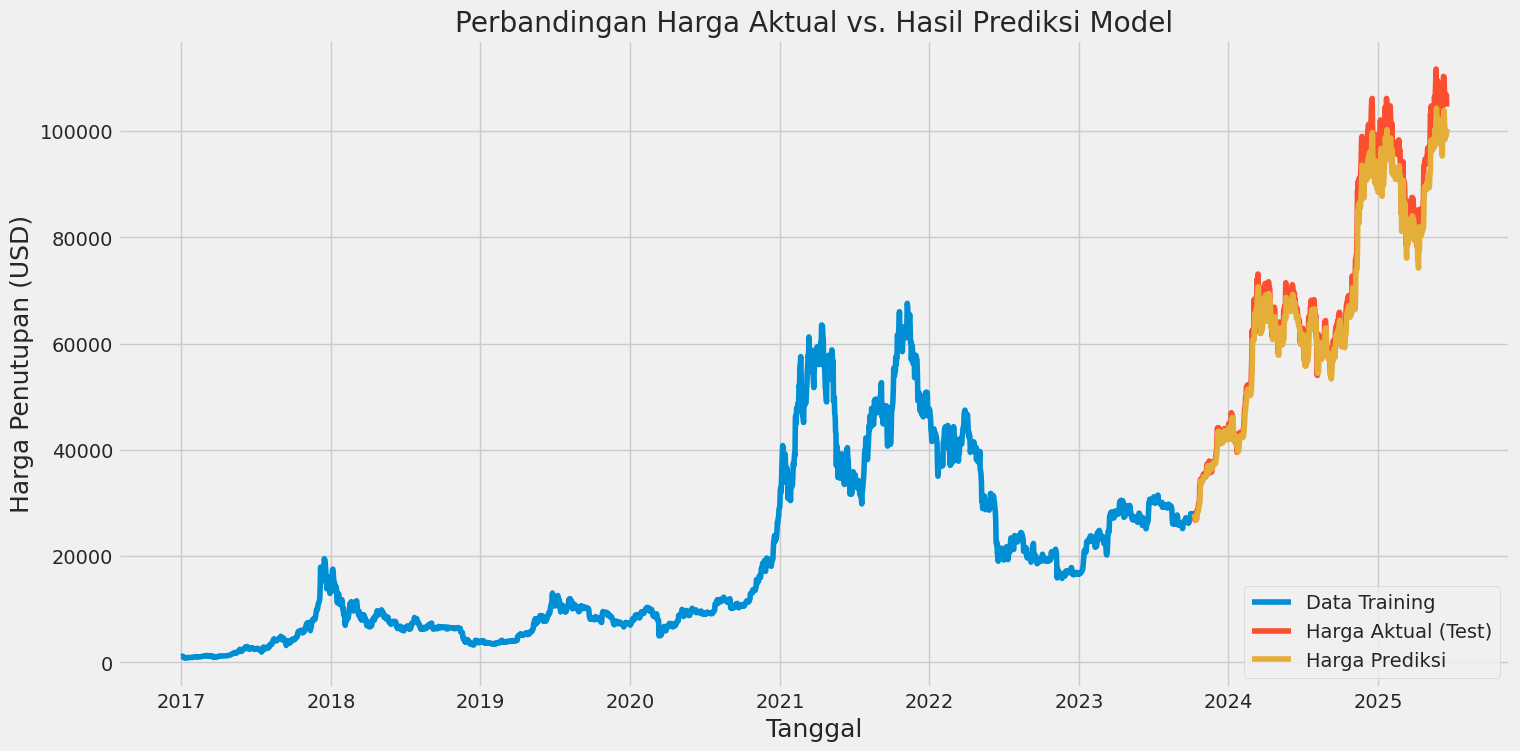

In [12]:
# Tahap 4: Evaluasi & Penyimpanan Model
# Langkah 4.1: Prediksi & Evaluasi

# 1. Buat prediksi menggunakan data test (X_test)
predictions_scaled = model.predict(X_test)

# 2. Kembalikan data ke skala aslinya
# Kita gunakan 'scaler' yang sama dengan yang kita gunakan untuk normalisasi
predictions = scaler.inverse_transform(predictions_scaled)

# 3. Hitung nilai Root Mean Squared Error (RMSE)
# RMSE adalah metrik yang bagus untuk mengetahui seberapa besar error dalam satuan asli (USD)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("========================================")
print("Hasil Evaluasi Model pada Data Test")
print("========================================")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print("Artinya, secara rata-rata, prediksi model kita meleset sekitar nilai ini dari harga sebenarnya.")

# 4. Visualisasikan hasil prediksi vs data aktual
print("\nMembuat plot perbandingan harga aktual vs. prediksi...")

# Siapkan data untuk diplot
train = data_close[:training_data_len]
valid = data_close[training_data_len:]
valid['Predictions'] = predictions # Tambahkan kolom prediksi ke dataframe validasi

# Plot hasil
plt.figure(figsize=(16,8))
plt.title('Perbandingan Harga Aktual vs. Hasil Prediksi Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga Penutupan (USD)', fontsize=18)
plt.plot(train['Close'], label='Data Training')
plt.plot(valid[['Close', 'Predictions']], label=['Harga Aktual (Test)', 'Harga Prediksi'])
plt.legend(['Data Training', 'Harga Aktual (Test)', 'Harga Prediksi'], loc='lower right')
plt.show()

# Langkah 4.2: Penyimpanan Model

In [13]:
# Langkah 4.2: Penyimpanan Model

# Simpan arsitektur, bobot, dan konfigurasi optimizer model ke dalam satu file .h5
model.save('bitcoin_prediction_lstm_v1.h5')

# Kita juga perlu menyimpan scaler, karena kita membutuhkannya untuk memproses data baru di masa depan
import joblib
joblib.dump(scaler, '../scaler/scaler.gz')

print("========================================")
print("Model dan Scaler Berhasil Disimpan!")
print("========================================")
print("File yang disimpan: bitcoin_prediction_lstm_v1.h5 dan scaler.gz")

Model dan Scaler Berhasil Disimpan!
File yang disimpan: bitcoin_prediction_lstm_v1.h5 dan scaler.gz



# MEMBANGUN MODEL V2: PREDIKSI MULTIVARIATE (CLOSE + VOLUME)


In [14]:
# ==============================================================================
# MEMBANGUN MODEL V2: PREDIKSI MULTIVARIATE (CLOSE + VOLUME)
# ==============================================================================

# -- 1. Persiapan Data --
print("Langkah 1: Mempersiapkan data dengan 2 fitur (Close dan Volume)...")
# Pilih kolom 'Close' dan 'Volume'. Pastikan urutannya benar! Close pertama.
features = ['Close', 'Volume']
data_features = df.filter(features)

# Ubah ke numpy array dan lakukan normalisasi
# Scaler akan menormalisasi setiap kolom secara independen
scaler_v2 = MinMaxScaler(feature_range=(0,1))
scaled_data_v2 = scaler_v2.fit_transform(data_features)

# -- 2. Membuat Sekuens --
print("Langkah 2: Membuat sekuens data...")
time_step = 60
X_v2 = []
y_v2 = []

for i in range(time_step, len(scaled_data_v2)):
    # X_v2: Ambil 60 hari sebelumnya DARI KEDUA KOLOM (fitur)
    X_v2.append(scaled_data_v2[i-time_step:i, :])
    # y_v2: Ambil harga Close (kolom ke-0) pada hari ke-61 sebagai target
    y_v2.append(scaled_data_v2[i, 0])

# Ubah ke numpy array
X_v2, y_v2 = np.array(X_v2), np.array(y_v2)

# -- 3. Reshape Data --
# Fitur kita sekarang ada 2! Jadi, dimensi terakhir harus 2.
print("Langkah 3: Melakukan reshape data untuk input LSTM...")
X_v2 = np.reshape(X_v2, (X_v2.shape[0], X_v2.shape[1], 2)) #<-- Perubahan di sini

# -- 4. Pembagian Data Train/Test --
# Kita akan menggunakan proporsi yang sama (80/20)
training_data_len_v2 = int(np.ceil(len(X_v2) * .8))
X_train_v2, X_test_v2 = X_v2[:training_data_len_v2], X_v2[training_data_len_v2:]
y_train_v2, y_test_v2 = y_v2[:training_data_len_v2], y_v2[training_data_len_v2:]

print(f"\nBentuk data training v2: X={X_train_v2.shape}, y={y_train_v2.shape}")
print(f"Bentuk data testing v2: X={X_test_v2.shape}, y={y_test_v2.shape}")

# -- 5. Membangun Arsitektur Model v2 --
print("\nLangkah 5: Membangun arsitektur model v2...")
model_v2 = Sequential()
# Sesuaikan input_shape untuk menerima 2 fitur
model_v2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_v2.shape[1], 2))) #<-- Perubahan di sini
model_v2.add(Dropout(0.2))
model_v2.add(LSTM(units=50, return_sequences=True))
model_v2.add(Dropout(0.2))
model_v2.add(LSTM(units=50))
model_v2.add(Dropout(0.2))
model_v2.add(Dense(units=1))

# -- 6. Kompilasi & Pelatihan Model v2 --
print("Langkah 6: Mengompilasi dan melatih model v2...")
model_v2.compile(optimizer='adam', loss='mean_squared_error')

early_stopping_v2 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_v2 = model_v2.fit(
    X_train_v2,
    y_train_v2,
    batch_size=64,
    epochs=300,
    validation_split=0.1,
    callbacks=[early_stopping_v2],
    verbose=1
)

print("\n========================================")
print("Pelatihan Model v2 Selesai!")
print("========================================")

Langkah 1: Mempersiapkan data dengan 2 fitur (Close dan Volume)...
Langkah 2: Membuat sekuens data...
Langkah 3: Melakukan reshape data untuk input LSTM...

Bentuk data training v2: X=(2424, 60, 2), y=(2424,)
Bentuk data testing v2: X=(606, 60, 2), y=(606,)

Langkah 5: Membangun arsitektur model v2...
Langkah 6: Mengompilasi dan melatih model v2...
Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0114 - val_loss: 5.2847e-04
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0018 - val_loss: 2.7388e-04
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010 - val_loss: 4.0414e-04
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 2.4364e-04
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.9163e-04 - val_loss: 1.8911e-04
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.9144e-04 - val_loss: 2.0507e-04
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.4851e-04 - val_loss: 1.9545e-04
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2359e-04 - val_loss: 1.9260e-04
Epoch 9/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.9826e-04 - val_loss: 4.7530e-04
Epoch 10/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0010 - val_loss: 2.3968e-04
Epoch 11/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7770e-04 - val_loss: 6.3515e

# EVALUASI MODEL V2 DAN PERBANDINGAN DENGAN V1

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Perbandingan Performa Model
Model v1 (Hanya Close)   | RMSE: $3,785.01
Model v2 (Close + Volume) | RMSE: $4,455.83
----------------------------------------
HASIL: Model v2 tidak lebih baik. Error justru meningkat sebesar 17.72%.

Membuat plot perbandingan untuk Model v2...


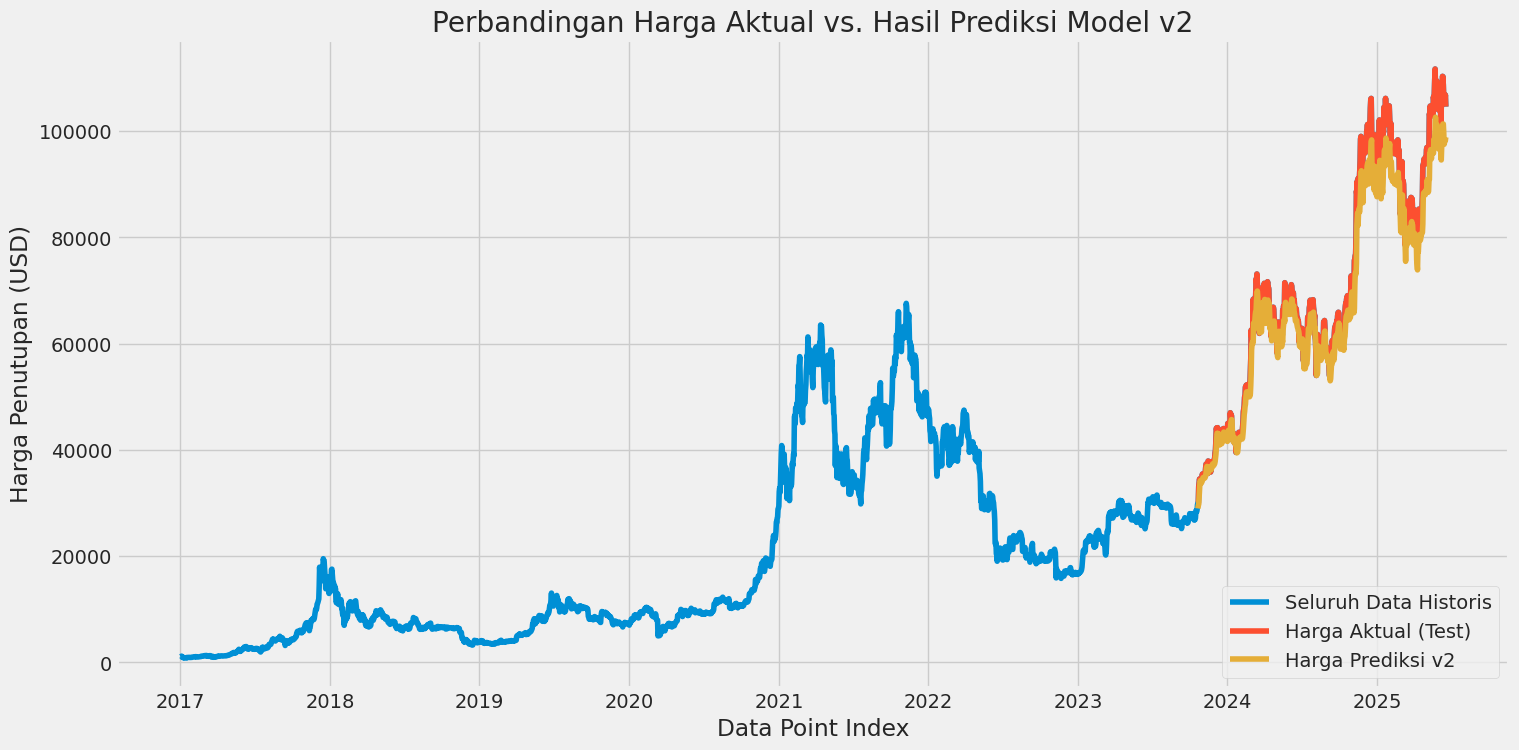

In [20]:
# ==============================================================================
# EVALUASI MODEL V2 DAN PERBANDINGAN DENGAN V1
# ==============================================================================

# 1. Buat prediksi menggunakan model v2
predictions_scaled_v2 = model_v2.predict(X_test_v2)

# 2. Persiapan untuk Inverse Transform (Trik Penting)
# Buat array dummy dengan shape (jumlah_prediksi, jumlah_fitur) -> (n, 2)
dummy_array = np.zeros((len(predictions_scaled_v2), 2))
# Masukkan hasil prediksi kita ke kolom pertama (kolom 'Close')
dummy_array[:, 0] = predictions_scaled_v2.flatten()
# Lakukan inverse transform
predictions_v2 = scaler_v2.inverse_transform(dummy_array)
# Ambil kembali hanya kolom pertama yang berisi prediksi harga 'Close' dalam USD
final_predictions_v2 = predictions_v2[:, 0]


# 3. Siapkan y_test dalam skala Dolar asli untuk perbandingan
# y_test_v2 saat ini masih dalam skala 0-1. Kita perlu yang asli.
y_test_actual = data_features[training_data_len_v2 + time_step:].values[:, 0]

# 4. Hitung RMSE untuk model v2
rmse_v2 = np.sqrt(mean_squared_error(y_test_actual, final_predictions_v2))


# 5. PERBANDINGAN HASIL
print("========================================")
print("Perbandingan Performa Model")
print("========================================")
# Anda bisa ganti angka ini dengan RMSE v1 Anda yang sebenarnya
rmse_v1 = 3785.01
print(f"Model v1 (Hanya Close)   | RMSE: ${rmse_v1:,.2f}")
print(f"Model v2 (Close + Volume) | RMSE: ${rmse_v2:,.2f}")
print("----------------------------------------")

# Beri kesimpulan
if rmse_v2 < rmse_v1:
    peningkatan = (rmse_v1 - rmse_v2) / rmse_v1 * 100
    print(f"HASIL: Model v2 LEBIH BAIK! Terjadi penurunan error sebesar {peningkatan:.2f}%.")
else:
    peningkatan = (rmse_v2 - rmse_v1) / rmse_v1 * 100
    print(f"HASIL: Model v2 tidak lebih baik. Error justru meningkat sebesar {peningkatan:.2f}%.")


# 6. Visualisasikan hasil prediksi v2
print("\nMembuat plot perbandingan untuk Model v2...")
valid_v2 = data_features[training_data_len_v2 + time_step:].copy()
valid_v2['Predictions'] = final_predictions_v2

plt.figure(figsize=(16,8))
plt.title('Perbandingan Harga Aktual vs. Hasil Prediksi Model v2')
plt.xlabel('Data Point Index')
plt.ylabel('Harga Penutupan (USD)')
plt.plot(df['Close'], label='Seluruh Data Historis') # Plot semua data untuk konteks
plt.plot(valid_v2[['Close', 'Predictions']], label=['Harga Aktual (Test)', 'Harga Prediksi v2'])
plt.legend(['Seluruh Data Historis', 'Harga Aktual (Test)', 'Harga Prediksi v2'], loc='lower right')
plt.show()

In [16]:
# ==============================================================================
# EKSPERIMEN 1: MENGUBAH TIME STEP MENJADI 30
# ==============================================================================

# -- 1. Persiapan Data dengan time_step baru --
print("Langkah 1: Mempersiapkan data dengan time_step = 30...")
# Kita gunakan kembali data 'Close' dan 'scaler' dari model v1
# data_close, dataset, scaled_data, scaler

time_step_exp1 = 30 # <-- PERUBAHAN UTAMA

# Membuat data training
X_train_exp1, y_train_exp1 = [], []
train_data = scaled_data[0:int(training_data_len), :]
for i in range(time_step_exp1, len(train_data)):
    X_train_exp1.append(train_data[i-time_step_exp1:i, 0])
    y_train_exp1.append(train_data[i, 0])

# Membuat data testing
X_test_exp1, y_test_exp1 = [], []
test_data = scaled_data[training_data_len - time_step_exp1: , :]
for i in range(time_step_exp1, len(test_data)):
    X_test_exp1.append(test_data[i-time_step_exp1:i, 0])
y_test_actual_exp1 = dataset[training_data_len:]


# Ubah ke numpy array dan reshape
X_train_exp1, y_train_exp1 = np.array(X_train_exp1), np.array(y_train_exp1)
X_test_exp1 = np.array(X_test_exp1)
X_train_exp1 = np.reshape(X_train_exp1, (X_train_exp1.shape[0], X_train_exp1.shape[1], 1))
X_test_exp1 = np.reshape(X_test_exp1, (X_test_exp1.shape[0], X_test_exp1.shape[1], 1))


# -- 2. Membangun & Melatih Model Eksperimen 1 --
print("\nLangkah 2: Membangun dan melatih model Eksperimen 1...")
model_exp1 = Sequential()
model_exp1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_exp1.shape[1], 1)))
model_exp1.add(Dropout(0.2))
model_exp1.add(LSTM(units=50, return_sequences=True))
model_exp1.add(Dropout(0.2))
model_exp1.add(LSTM(units=50))
model_exp1.add(Dropout(0.2))
model_exp1.add(Dense(units=1))

model_exp1.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_exp1.fit(X_train_exp1, y_train_exp1, batch_size=64, epochs=300, validation_split=0.1, callbacks=[early_stopping], verbose=0) # verbose=0 agar tidak terlalu ramai
print("Pelatihan Eksperimen 1 Selesai!")

# -- 3. Evaluasi & Perbandingan --
print("\nLangkah 3: Mengevaluasi model Eksperimen 1...")
predictions_scaled_exp1 = model_exp1.predict(X_test_exp1)
predictions_exp1 = scaler.inverse_transform(predictions_scaled_exp1)
rmse_exp1 = np.sqrt(mean_squared_error(y_test_actual_exp1, predictions_exp1))

print("\n========================================")
print("Hasil Perbandingan Eksperimen 1")
print("========================================")
rmse_v1 = 3785.01
print(f"Model v1 (time_step=60) | RMSE: ${rmse_v1:,.2f}")
print(f"Model Exp 1 (time_step=30)| RMSE: ${rmse_exp1:,.2f}")
print("----------------------------------------")

if rmse_exp1 < rmse_v1:
    peningkatan = (rmse_v1 - rmse_exp1) / rmse_v1 * 100
    print(f"HASIL: Model Eksperimen 1 LEBIH BAIK! Penurunan error: {peningkatan:.2f}%.")
else:
    peningkatan = (rmse_exp1 - rmse_v1) / rmse_v1 * 100
    print(f"HASIL: Model Eksperimen 1 tidak lebih baik. Kenaikan error: {peningkatan:.2f}%.")

Langkah 1: Mempersiapkan data dengan time_step = 30...

Langkah 2: Membangun dan melatih model Eksperimen 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Pelatihan Eksperimen 1 Selesai!

Langkah 3: Mengevaluasi model Eksperimen 1...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Hasil Perbandingan Eksperimen 1
Model v1 (time_step=60) | RMSE: $3,785.01
Model Exp 1 (time_step=30)| RMSE: $4,246.53
----------------------------------------
HASIL: Model Eksperimen 1 tidak lebih baik. Kenaikan error: 12.19%.


In [17]:
# ==============================================================================
# EKSPERIMEN 2: MENGUBAH UNITS LSTM MENJADI 100
# ==============================================================================

# -- 1. Persiapan Data (kembali menggunakan time_step=60 yang terbukti) --
print("Langkah 1: Mempersiapkan data dengan time_step = 60...")
time_step_exp2 = 60

# Data preparation
X_train_exp2, y_train_exp2 = [], []
train_data = scaled_data[0:int(training_data_len), :]
for i in range(time_step_exp2, len(train_data)):
    X_train_exp2.append(train_data[i-time_step_exp2:i, 0])
    y_train_exp2.append(train_data[i, 0])

X_test_exp2, y_test_exp2 = [], []
test_data = scaled_data[training_data_len - time_step_exp2: , :]
for i in range(time_step_exp2, len(test_data)):
    X_test_exp2.append(test_data[i-time_step_exp2:i, 0])
y_test_actual_exp2 = dataset[training_data_len:]

X_train_exp2, y_train_exp2 = np.array(X_train_exp2), np.array(y_train_exp2)
X_test_exp2 = np.array(X_test_exp2)
X_train_exp2 = np.reshape(X_train_exp2, (X_train_exp2.shape[0], X_train_exp2.shape[1], 1))
X_test_exp2 = np.reshape(X_test_exp2, (X_test_exp2.shape[0], X_test_exp2.shape[1], 1))

# -- 2. Membangun & Melatih Model Eksperimen 2 --
print("\nLangkah 2: Membangun dan melatih model dengan 100 units...")
model_exp2 = Sequential()
# PERUBAHAN UTAMA DI SINI: units=100
model_exp2.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_exp2.shape[1], 1)))
model_exp2.add(Dropout(0.2))
model_exp2.add(LSTM(units=100, return_sequences=True))
model_exp2.add(Dropout(0.2))
model_exp2.add(LSTM(units=100))
model_exp2.add(Dropout(0.2))
model_exp2.add(Dense(units=1))

model_exp2.compile(optimizer='adam', loss='mean_squared_error')
# Kita gunakan callback yang sama
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Latih model, perhatikan ini mungkin sedikit lebih lama
model_exp2.fit(X_train_exp2, y_train_exp2, batch_size=64, epochs=300, validation_split=0.1, callbacks=[early_stopping], verbose=0)
print("Pelatihan Eksperimen 2 Selesai!")

# -- 3. Evaluasi & Perbandingan --
print("\nLangkah 3: Mengevaluasi model Eksperimen 2...")
predictions_scaled_exp2 = model_exp2.predict(X_test_exp2)
predictions_exp2 = scaler.inverse_transform(predictions_scaled_exp2)
rmse_exp2 = np.sqrt(mean_squared_error(y_test_actual_exp2, predictions_exp2))

print("\n========================================")
print("Hasil Perbandingan Eksperimen 2")
print("========================================")
rmse_v1 = 3785.01
print(f"Model v1 (units=50)    | RMSE: ${rmse_v1:,.2f}")
print(f"Model Exp 2 (units=100)| RMSE: ${rmse_exp2:,.2f}")
print("----------------------------------------")

if rmse_exp2 < rmse_v1:
    peningkatan = (rmse_v1 - rmse_exp2) / rmse_v1 * 100
    print(f"HASIL: Model Eksperimen 2 LEBIH BAIK! Penurunan error: {peningkatan:.2f}%.")
else:
    peningkatan = (rmse_exp2 - rmse_v1) / rmse_v1 * 100
    print(f"HASIL: Model Eksperimen 2 tidak lebih baik. Kenaikan error: {peningkatan:.2f}%.")

Langkah 1: Mempersiapkan data dengan time_step = 60...

Langkah 2: Membangun dan melatih model dengan 100 units...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Pelatihan Eksperimen 2 Selesai!

Langkah 3: Mengevaluasi model Eksperimen 2...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Hasil Perbandingan Eksperimen 2
Model v1 (units=50)    | RMSE: $3,785.01
Model Exp 2 (units=100)| RMSE: $3,029.95
----------------------------------------
HASIL: Model Eksperimen 2 LEBIH BAIK! Penurunan error: 19.95%.


Model Juara Berhasil Disimpan!
File: bitcoin_prediction_lstm_FINAL.h5
Dengan Performa RMSE: $3,029.95

Membuat plot perbandingan untuk Model FINAL...


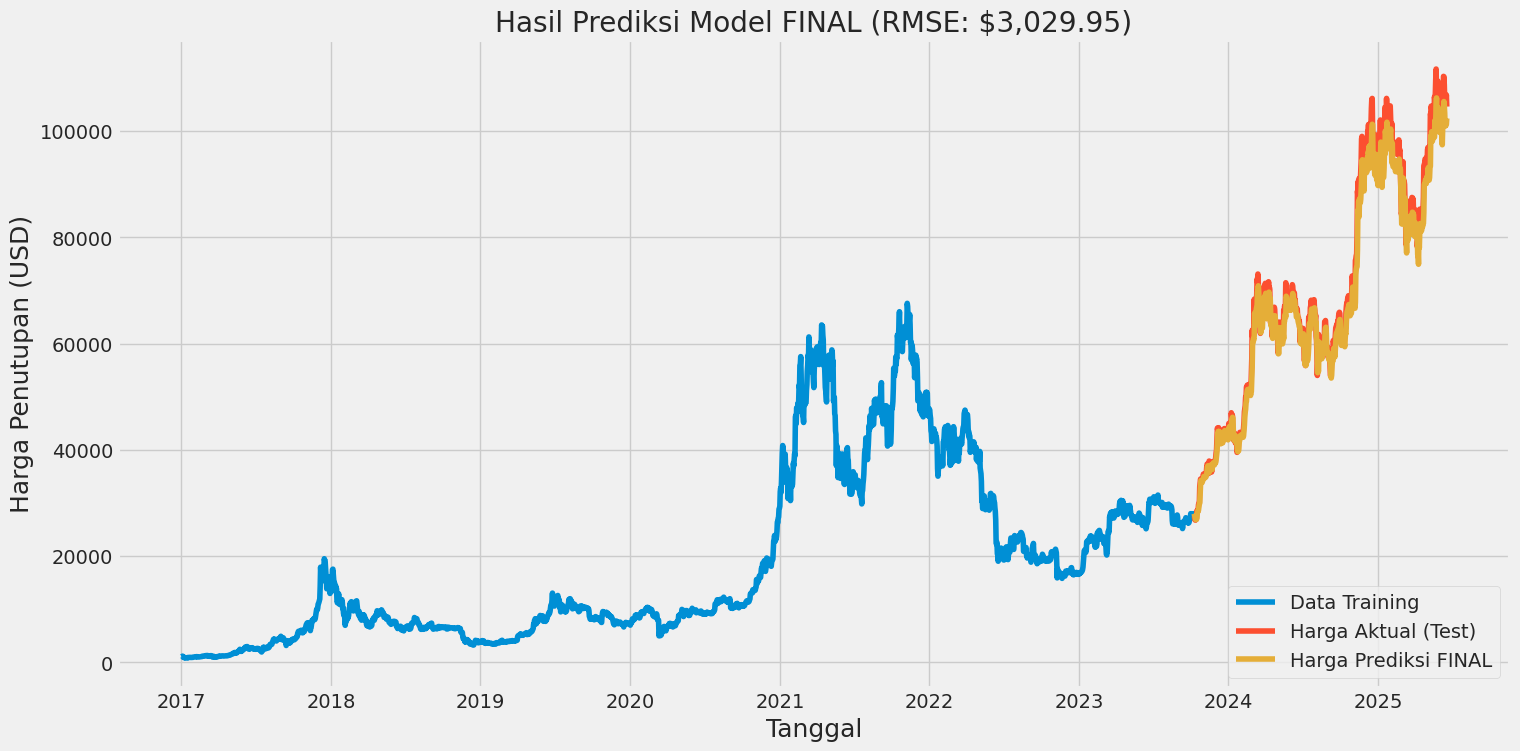

In [19]:
# ==============================================================================
# FINALISASI PROYEK: MENYIMPAN MODEL TERBAIK
# ==============================================================================

# 1. Simpan model juara (model_exp2) dengan nama final
# Nama ini menunjukkan ini adalah versi terbaik dari serangkaian eksperimen kita
model_exp2.save('bitcoin_prediction_lstm_FINAL.h5')

# Scaler yang kita gunakan sama dengan scaler model v1, kita pastikan sudah tersimpan
# import joblib
# joblib.dump(scaler, 'scaler.gz') # (sudah kita lakukan, tapi baik untuk diingat)

print("========================================")
print("Model Juara Berhasil Disimpan!")
print("File: bitcoin_prediction_lstm_FINAL.h5")
print(f"Dengan Performa RMSE: ${rmse_exp2:,.2f}")
print("========================================")


# 2. Visualisasikan prediksi dari model terbaik kita
print("\nMembuat plot perbandingan untuk Model FINAL...")
# Kita gunakan variabel dari Eksperimen 2
valid_exp2 = data_close[training_data_len:].copy() # Gunakan data_close asli untuk plot
valid_exp2['Predictions'] = predictions_exp2

plt.figure(figsize=(16,8))
plt.title('Hasil Prediksi Model FINAL (RMSE: $3,029.95)')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga Penutupan (USD)', fontsize=18)
plt.plot(train['Close'], label='Data Training')
plt.plot(valid_exp2[['Close', 'Predictions']], label=['Harga Aktual (Test)', 'Harga Prediksi FINAL'])
plt.legend(['Data Training', 'Harga Aktual (Test)', 'Harga Prediksi FINAL'], loc='lower right')
plt.show()

In [21]:
import pandas as pd

# Siapkan data untuk tabel perbandingan
comparison_data = {
    'Model': [
        'Model v1 (Baseline)',
        'Model v2 (Multivariate)',
        'Eksperimen 1 (Optimasi)',
        'Eksperimen 2 (Optimasi)'
    ],
    'Deskripsi': [
        'Univariat (Hanya Close)',
        'Multivariat (Close + Volume)',
        'Univariat, time_step=30',
        'Univariat, units=100'
    ],
    'Time Step': [60, 60, 30, 60],
    'LSTM Units': [50, 50, 50, 100],
    'RMSE ($)': [
        3785.01, # Dari hasil v1
        4455.83, # Dari hasil v2
        4246.53, # Dari hasil Exp 1
        3029.95  # Dari hasil Exp 2 (Juara)
    ]
}

# Buat DataFrame dari data di atas
comparison_df = pd.DataFrame(comparison_data)

# Tandai model terbaik
comparison_df['Status'] = comparison_df['RMSE ($)'].apply(
    lambda x: '<-- MODEL TERBAIK' if x == comparison_df['RMSE ($)'].min() else ''
)

print("========================================================")
print("              Tabel Final Perbandingan Model            ")
print("========================================================")
display(comparison_df)

              Tabel Final Perbandingan Model            


,Model,Deskripsi,Time Step,LSTM Units,RMSE ($),Status
0,Model v1 (Baseline),Univariat (Hanya Close),60,50,3785.01,
1,Model v2 (Multivariate),Multivariat (Close + Volume),60,50,4455.83,
2,Eksperimen 1 (Optimasi),"Univariat, time_step=30",30,50,4246.53,
3,Eksperimen 2 (Optimasi),"Univariat, units=100",60,100,3029.95,<-- MODEL TERBAIK


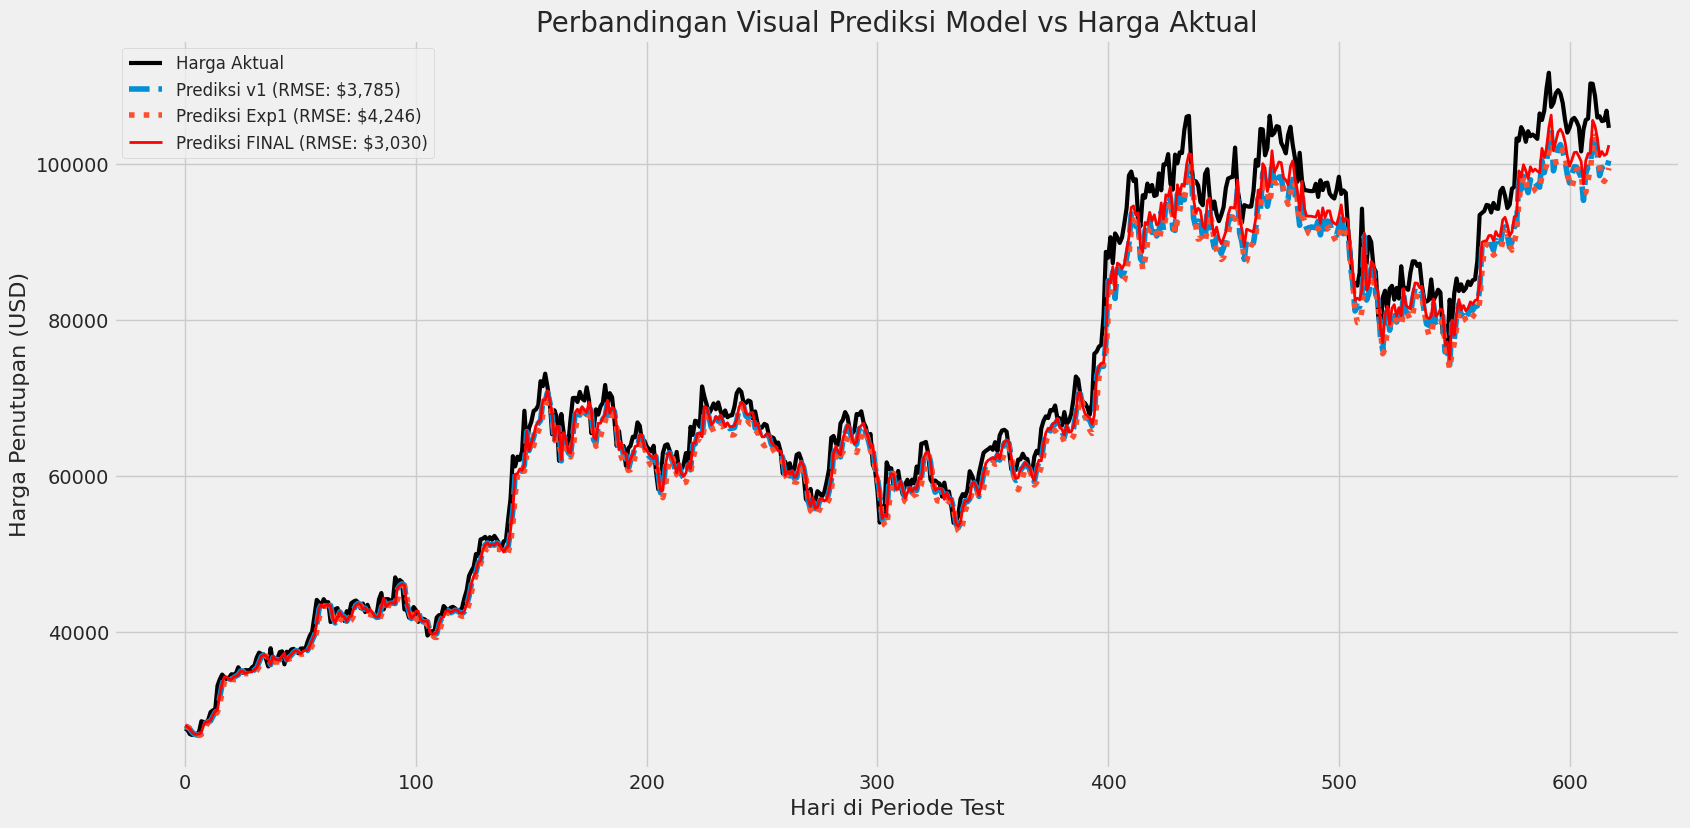

In [22]:
# Siapkan DataFrame untuk plotting
# Pastikan y_test_actual_exp2 dan predictions/predictions_exp1/predictions_exp2 sudah ada dari langkah sebelumnya
# y_test_actual_exp2 adalah data harga asli di periode test
comparison_plot_df = pd.DataFrame({'Harga Aktual': y_test_actual_exp2.flatten()})

# Tambahkan kolom prediksi dari setiap model
# Pastikan panjang arraynya sama
comparison_plot_df['Prediksi v1 (units=50, ts=60)'] = predictions # Dari evaluasi v1
comparison_plot_df['Prediksi Exp1 (units=50, ts=30)'] = predictions_exp1 # Dari evaluasi Exp1
comparison_plot_df['Prediksi Exp2 (units=100, ts=60)'] = predictions_exp2 # Dari evaluasi Exp2

# Plot hasil
plt.figure(figsize=(18, 9))
plt.title('Perbandingan Visual Prediksi Model vs Harga Aktual', fontsize=20)
plt.xlabel('Hari di Periode Test', fontsize=16)
plt.ylabel('Harga Penutupan (USD)', fontsize=16)

# Plot harga aktual
plt.plot(comparison_plot_df['Harga Aktual'], label='Harga Aktual', color='black', linewidth=3)

# Plot prediksi dari setiap model
plt.plot(comparison_plot_df['Prediksi v1 (units=50, ts=60)'], label='Prediksi v1 (RMSE: $3,785)', linestyle='--')
plt.plot(comparison_plot_df['Prediksi Exp1 (units=50, ts=30)'], label='Prediksi Exp1 (RMSE: $4,246)', linestyle=':')
plt.plot(comparison_plot_df['Prediksi Exp2 (units=100, ts=60)'], label='Prediksi FINAL (RMSE: $3,030)', color='red', linewidth=2)


plt.legend(fontsize=12)
plt.grid(True)
plt.show()